## Tutorials


### First of all, let's provide input data. We can begin with sets of words and simulated meanings (as the example shows), or use other types of data.

In [1]:
## Provide your own words and meanings data
"""
The data should be in the dictionary form of {word_1:(initial frequency of word_1, [(meaning_1 of word_1, initial frequency of
meaning_1,fitness of meaning_1),...(meaning_n of word_1, initial frequency of meaning_n,fitness of meaning_n)]),..., word_n:...}
"""
words_meanings = {'apple':(0.3,[('red',0.15,20),('fruit',0.6,30),('eatable',0.25,5)]),\
                  'tomato':(0.8,[('red',0.3,20),('fruit',0.3,40),('vegetable',0.4,15)])}

### Implementing a Contextual Geometric Structure (CGS) in software.

#### The easiest way to implement CGS is using Python-based widgets tools. 

In [2]:
## Import all the required packages
import numpy as np
from CGS_parcels.CGS_notebook_tool import CGS_field_initializer

In [3]:
## Initialize CGS_field_initializer
## After filling in the form, there is no need to run this block again. Just keep on to the next block.
CGS_tool = CGS_field_initializer()
CGS_tool.display()

Q0dTX2ZpZWxkX2luaXRpYWxpemVyKGNoaWxkcmVuPShTZWxlY3QoZGVzY3JpcHRpb249dSdTZWxlY3QgYSBmaWVsZCBzZXR0aW5nOiAnLCBvcHRpb25zPSgncmFuZG9tJywgJ3ZvcnRleCcsICfigKY=


In [4]:
CGS_tool.build(words_meanings)

In [5]:
CGS_tool.table()

,"(apple--eatable, total)","(apple--fruit, total)","(apple--red, total)","(tomato--fruit, total)","(tomato--red, total)","(tomato--vegetable, total)"
0,0.07,0.16,0.04,0.22,0.22,0.29
1,0.07,0.16,0.04,0.22,0.22,0.29
2,0.07,0.16,0.04,0.22,0.22,0.29
3,0.07,0.16,0.04,0.22,0.22,0.29
4,NaN,0.21,0.06,0.50,0.23,NaN
5,NaN,0.21,0.06,0.50,0.23,NaN
6,NaN,0.21,0.06,0.50,0.23,NaN
7,NaN,0.21,0.06,0.50,0.23,NaN
8,NaN,0.21,0.06,0.50,0.23,NaN
9,NaN,0.14,0.13,0.41,0.32,NaN


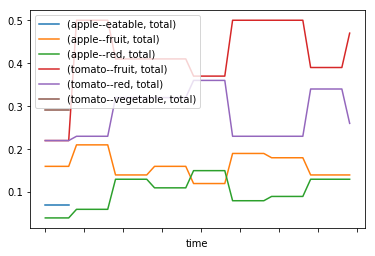

In [6]:
CGS_tool.plot()

In [7]:
CGS_tool.animate()

### Implementing CGS Using an API

#### Another way to implement CGS is through the use of an API.

In [8]:
## Import all the required packages
import numpy as np
from CGS_parcels.fieldset import CGS_field
from CGS_parcels.kernel import kernel

In [9]:
## Determine the flow velocities within the field.
""" 
An easy example here is through random initialization.
The velocities are suggested to be within the range from 1e-4 to 5e-4.
"""
x_vel = np.random.uniform(-1.0,1.0,[10,10])*2e-4
y_vel = np.random.uniform(-1.0,1.0,[10,10])*2e-4

## Determine the initial positions of particles within the field.
""" 
An easy example here is through random initialization.
The positions are restricted to be within the range from 0 to 1.
"""
particle_num = 30
xpos = np.random.rand(particle_num)
ypos = np.random.rand(particle_num)

## Initialize CGS_fieldset
cgs = CGS_field(x_vel,y_vel)
cgs.deploy_kernels(xpos,ypos,kernel)
## Feed the data of words and meanings into kernel_set
kset = cgs.kset
kset.set_kernel(words_meanings)

## Do simulation
output_filename = 'testing' # Could provide the full path.
sim_len = 50 # Total time length for simulation.
sim_period = 5 # Time period for simulation.
collision_thres = 1e-4 # The threshold below which the distance between two particles are considered as collision.
mutation_period = 5 # The period for mutations to happen. If the value is 2, mutations happen every 2 sim_period.
cgs.simulate(sim_len,sim_period,output_filename,collision_thres,mutation_period)

In [10]:
## If using word frequency data from google ngrams is preferred. (https://books.google.com/ngrams)
## This block demonstrates how to fetch frequency data of words from google ngrams. However, the absolute frequencies
## will be modified to relative frequencies for CGS usage. 
from CGS_parcels.ngrams import use_ngram

## Provide word_meaning data, but do not need to feed frequencies of words.
words_meanings_no_freq = {'apple':([('red',0.15,20),('fruit',0.6,30),('eatable',0.25,5)]),\
                  'tomato':([('red',0.3,20),('fruit',0.3,40),('vegetable',0.4,15)])}
## Choose a year of which word frequency data is used. For example, 1800.
new_words_meanings = use_ngram(words_meanings_no_freq,year=1800)
## Then feed the data into kset.set_kernel
kset.set_kernel(new_words_meanings)

In [11]:
## Animation of the simulation
animation_interval = 100 # Default to be 200
cgs.plot_trajectories(output_filename,animation_interval)

In [12]:
## Table of the simulation results
cgs.word_freq_table()

,"(apple--eatable, total)","(apple--fruit, total)","(apple--red, total)","(tomato--fruit, total)","(tomato--red, total)","(tomato--vegetable, total)"
0,0.066667,0.166667,0.033333,0.233333,0.233333,0.266667
1,0.066667,0.166667,0.033333,0.233333,0.233333,0.266667
2,0.066667,0.166667,0.033333,0.233333,0.233333,0.266667
3,0.066667,0.166667,0.033333,0.233333,0.233333,0.266667
4,NaN,0.200000,0.066667,0.566667,0.166667,NaN
5,NaN,0.200000,0.066667,0.566667,0.166667,NaN
6,NaN,0.200000,0.066667,0.566667,0.166667,NaN
7,NaN,0.200000,0.066667,0.566667,0.166667,NaN
8,NaN,0.200000,0.066667,0.566667,0.166667,NaN
9,NaN,0.233333,0.033333,0.400000,0.333333,NaN


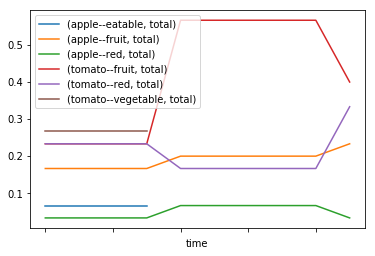

In [13]:
## Plot the simulation results
cgs.plot_wordfreq()